In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.
import tensorflow as tf
from tensorflow import keras
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv


Using TensorFlow backend.


In [2]:
train=pd.read_csv("../input/digit-recognizer/train.csv")
test=pd.read_csv("../input/digit-recognizer/test.csv")

In [3]:
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X_train = train.iloc[:,1:].to_numpy()
Y_train = train.label.to_numpy()
X_test = test.to_numpy()

X_train= X_train.reshape(-1,28,28,1)
X_test= X_test.reshape(-1,28,28,1)

In [5]:
X_train.shape

(42000, 28, 28, 1)

In [6]:
X_train = X_train/255.0
X_test = X_test/255.0
Y_train = to_categorical(Y_train, num_classes = 10)       #dont use tf.one_hot as sklearn can't split tensors

In [7]:
random_seed=1
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

In [8]:
model = Sequential()

model.add(Conv2D(32,kernel_size=5,padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.40))

model.add(Conv2D(64,kernel_size=5,padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.40))

model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.40))

model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)             

In [9]:
x_train.shape

(37800, 28, 28, 1)

In [10]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [11]:
batch_size=256
epochs=50

history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data = (x_val,y_val))

Train on 37800 samples, validate on 4200 samples
Epoch 1/50
37800/37800 [==============================] - 6s 158us/step - loss: 0.4969 - accuracy: 0.8421 - val_loss: 0.1082 - val_accuracy: 0.9683
Epoch 2/50
37800/37800 [==============================] - 1s 38us/step - loss: 0.1376 - accuracy: 0.9576 - val_loss: 0.0720 - val_accuracy: 0.9774
Epoch 3/50
37800/37800 [==============================] - 2s 44us/step - loss: 0.0995 - accuracy: 0.9697 - val_loss: 0.0544 - val_accuracy: 0.9838
Epoch 4/50
37800/37800 [==============================] - 2s 40us/step - loss: 0.0818 - accuracy: 0.9753 - val_loss: 0.0453 - val_accuracy: 0.9876
Epoch 5/50
37800/37800 [==============================] - 1s 38us/step - loss: 0.0684 - accuracy: 0.9794 - val_loss: 0.0445 - val_accuracy: 0.9862
Epoch 6/50
37800/37800 [==============================] - 1s 38us/step - loss: 0.0607 - accuracy: 0.9817 - val_loss: 0.0409 - val_accuracy: 0.9871
Epoch 7/50
37800/37800 [==============================] - 1s 38us/st

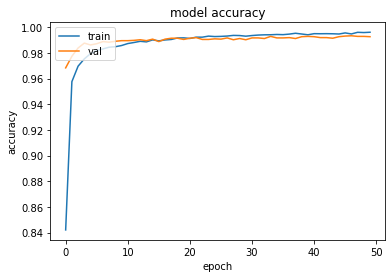

In [12]:
#print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

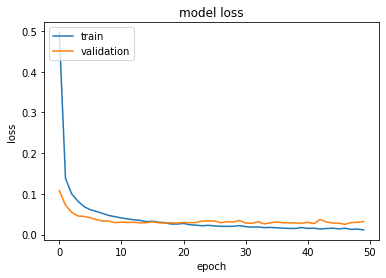

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [14]:
results = model.predict(X_test)
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")

submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("cnn_mnist.csv",index=False)